In [176]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from utils import distance
from utils import CommonFunctions as CF

import importlib
importlib.reload(distance)
importlib.reload(CF)

import networkx as nx

In [9]:
def create_graph_comms(N, num_groups, p_in, p_out):
    nodes_per_group = N//num_groups;
    print('Block model probs: in %f - out %f' % (p_in, p_out))

    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

    while nx.is_connected(G_gn) == 0:
        print('The network should be in a single component. New trial!')
        G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

    infoG_gn = ['GN',k_out]

    print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))
    
    return G_gn

In [10]:
N = 128
num_groups = 4

In [13]:
p_in=0.7, p_out=0.01

G_gn = create_graph_comms(N, num_groups, p_in, p_out)
A_gn = nx.to_numpy_array(G_gn)

G_rand = nx.random_reference(G_gn, niter=1)
A_rand = nx.to_numpy_array(G_rand)

Block model probs: in 0.700000 - out 0.010000
Mean degree 22.421875


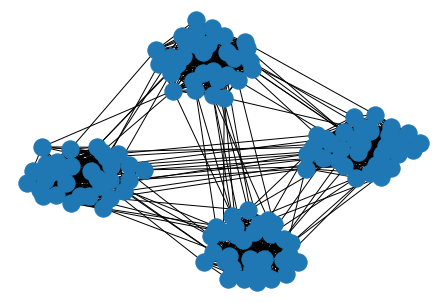

In [14]:
nx.draw(G_gn)

In [98]:
G_fc = nx.fast_gnp_random_graph(N, p=1)
A_fc = nx.to_numpy_array(G_fc)

In [189]:
name=f'N_{N}_C_{num_groups}_pin_{p_in}_pout_{p_out}.txt'

# Diffusion distance

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


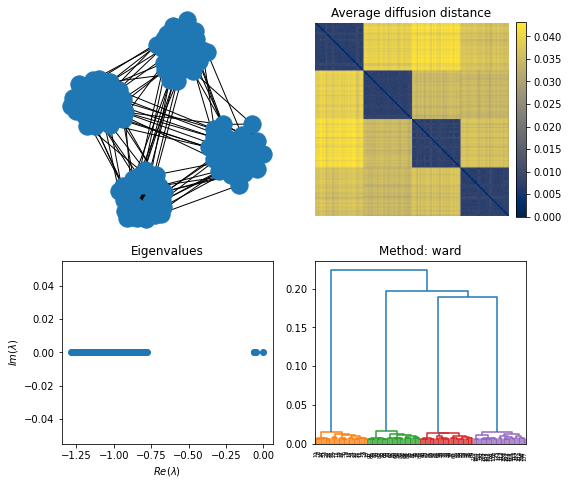

In [191]:
res_gn = distance.diffusion_distance(A_gn, args=[1, 1], name=name)

DIFFUSION DISTANCE
- Compute average distance...
5 1


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


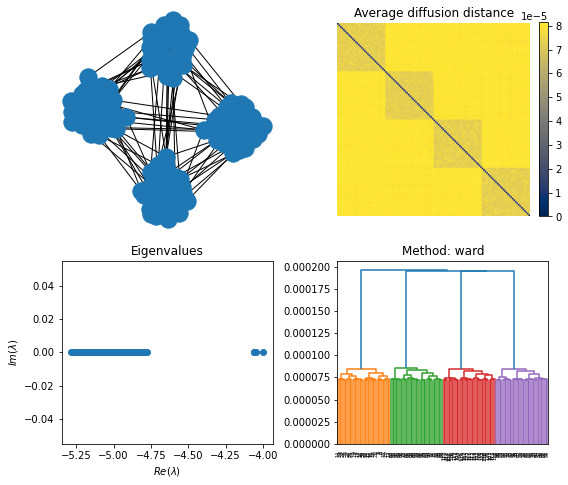

In [140]:
res_gn = distance.diffusion_distance(A_gn, args=[5, 1])

DIFFUSION DISTANCE
- Compute average distance...
1.0 1.0


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


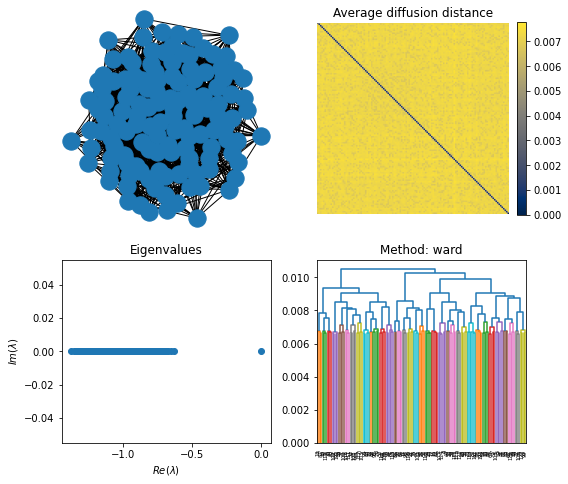

In [137]:
res_rand = distance.diffusion_distance(A_rand)

DIFFUSION DISTANCE
- Compute average distance...
1.0 1.0


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


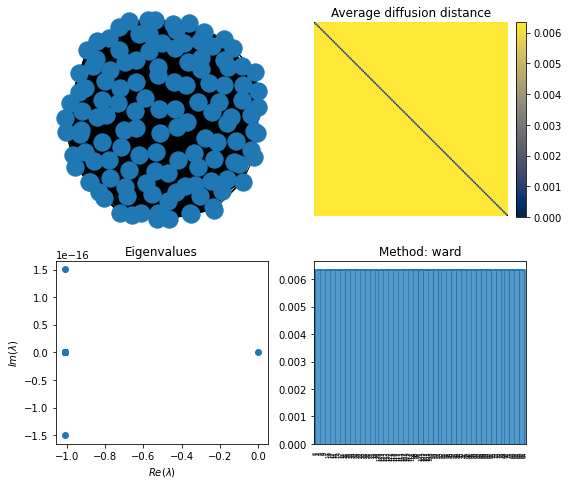

In [138]:
res_rand = distance.diffusion_distance(A_fc)

# Noisy voter model

JACOBIAN DISTANCE
Dynamics: NoisyVM


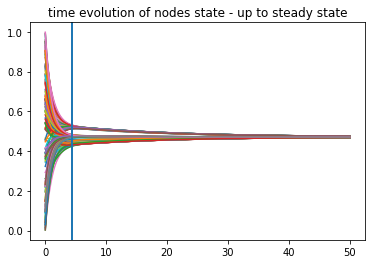

Normalizing jacobian - $\lambda_{max}=$1.283095877998824
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


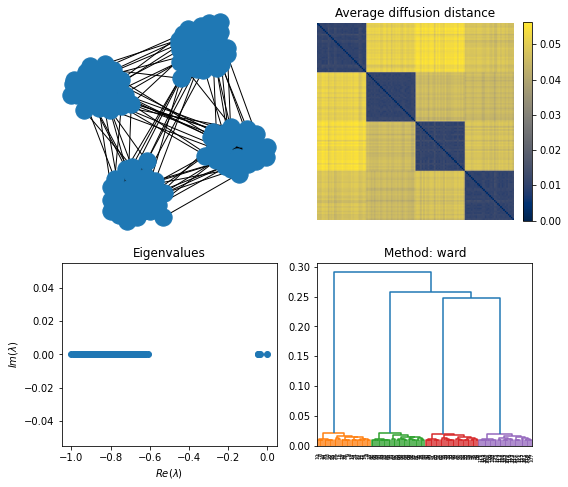

In [192]:
res_nvm = distance.jacobian_distance(A_gn, 'NoisyVM', norm=True, args=[0., 1., 1.], name=name)

JACOBIAN DISTANCE
Dynamics: NoisyVM


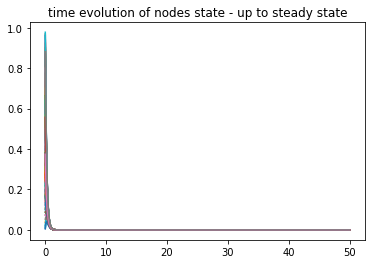

Normalizing jacobian - $\lambda_{max}=$5.283095877998843
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [178]:
res_nvm = distance.jacobian_distance(A_gn, 'NoisyVM', norm=True, args=[0, 5, 1], name=name)

# Jacobian epidemics

In [193]:
params = [[1, 1],
          [5, 1],
          [10, 1],
          [50, 1],
          [100, 1]]

JACOBIAN DISTANCE
Dynamics: Epidemics


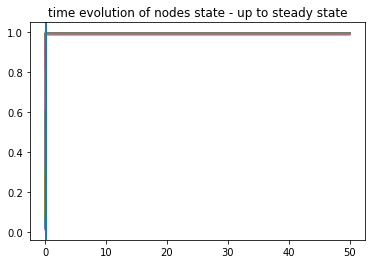

Normalizing jacobian - $\lambda_{max}=$31.733905737734965
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


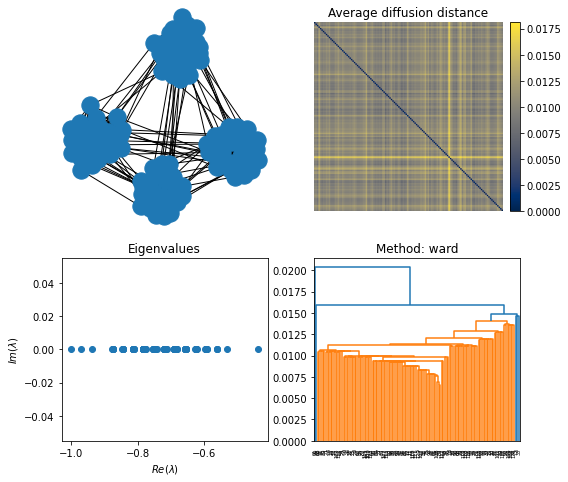

In [119]:
res_epi = distance.jacobian_distance(A_gn, 'Epidemics', norm=True, args=[1, 5])

JACOBIAN DISTANCE
Dynamics: Epidemics


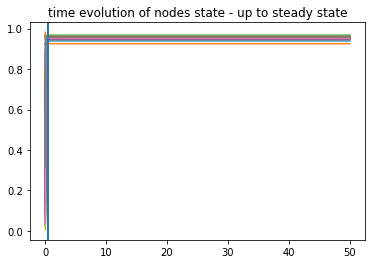

Normalizing jacobian - $\lambda_{max}=$30.646350267797647
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


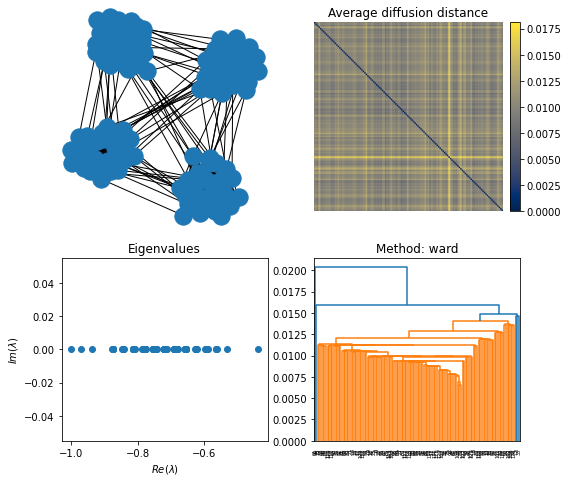

JACOBIAN DISTANCE
Dynamics: Epidemics


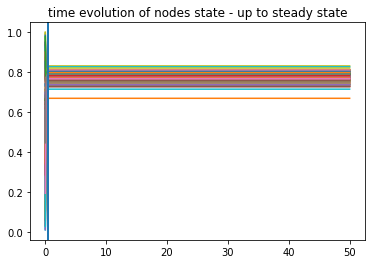

Normalizing jacobian - $\lambda_{max}=$29.389616856479826
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


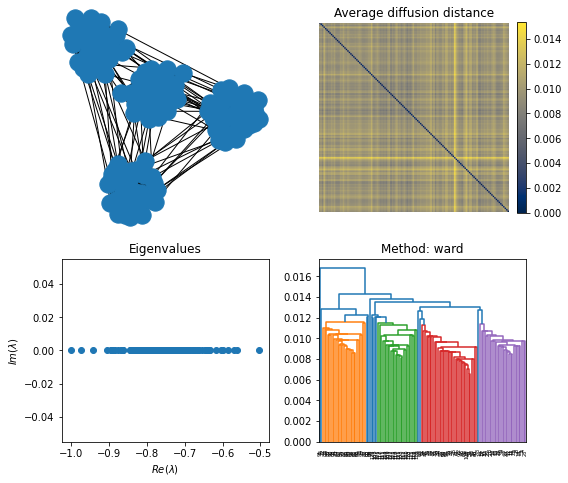

JACOBIAN DISTANCE
Dynamics: Epidemics


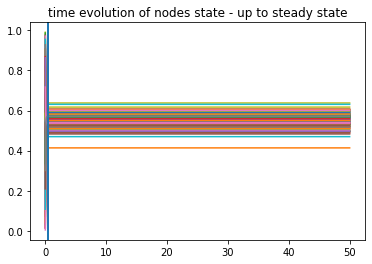

Normalizing jacobian - $\lambda_{max}=$28.136724398532206
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


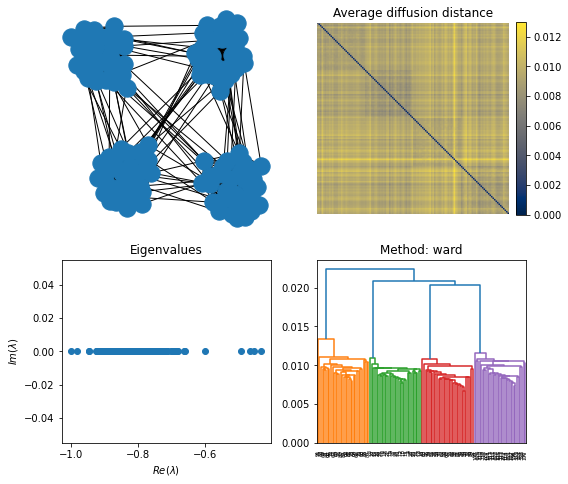

JACOBIAN DISTANCE
Dynamics: Epidemics


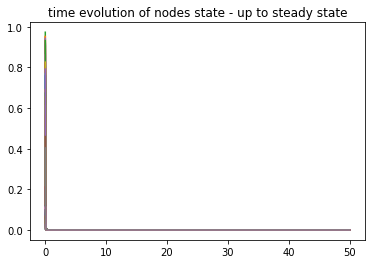

Normalizing jacobian - $\lambda_{max}=$56.090502689108234
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


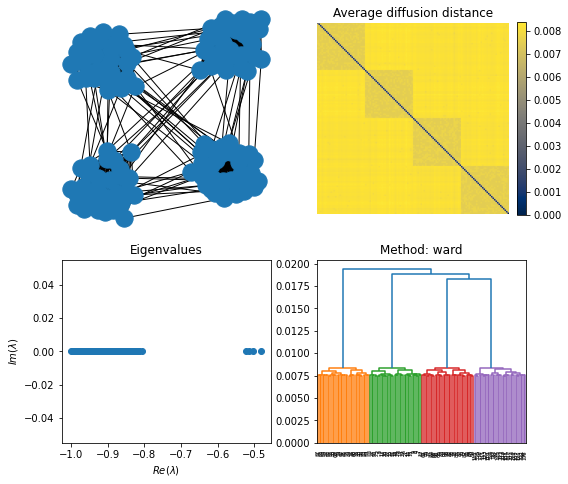

JACOBIAN DISTANCE
Dynamics: Epidemics


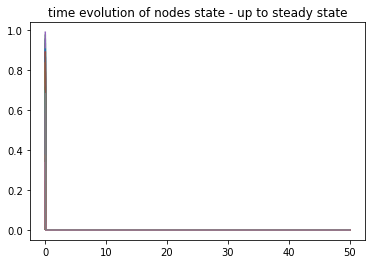

Normalizing jacobian - $\lambda_{max}=$106.09050268910771
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


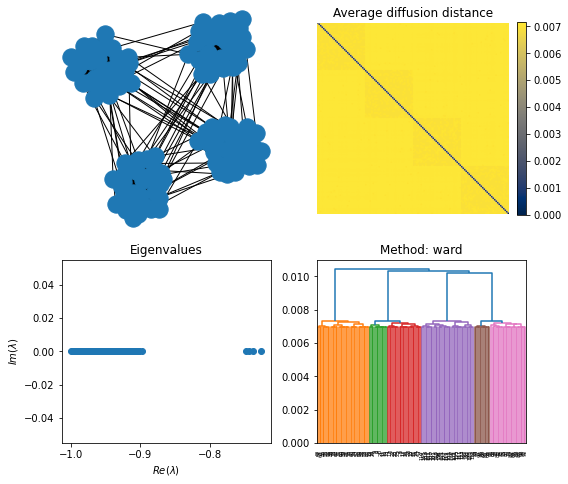

In [194]:
for param in params:
    res_epi = distance.jacobian_distance(A_gn, 'Epidemics', norm=True, args=param, name=name)

JACOBIAN DISTANCE
Dynamics: Epidemics


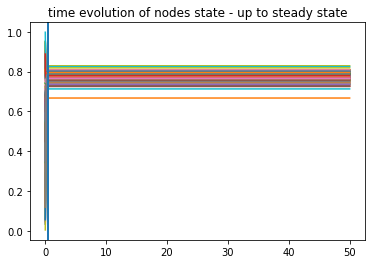

Normalizing jacobian - $\lambda_{max}=$29.389616856479712
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


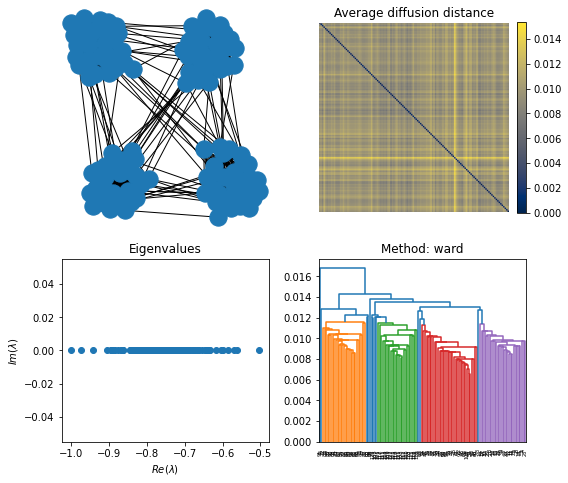

In [116]:
res_epi = distance.jacobian_distance(A_gn, 'Epidemics', norm=True, args=[5, 1])

JACOBIAN DISTANCE
Dynamics: Epidemics


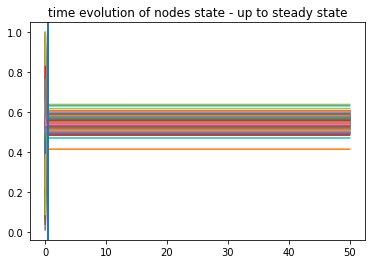

Normalizing jacobian - $\lambda_{max}=$28.136724398532277
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


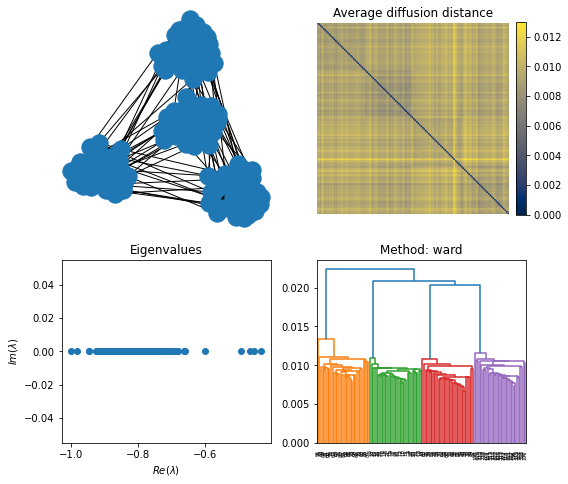

In [117]:
res_epi = distance.jacobian_distance(A_gn, 'Epidemics', norm=True, args=[10, 1])

JACOBIAN DISTANCE
Dynamics: Epidemics


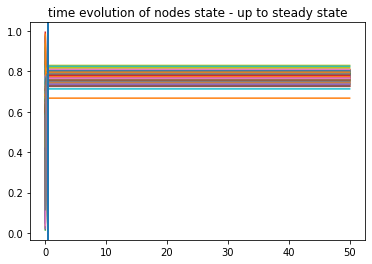

Normalizing jacobian - $\lambda_{max}=$29.38961685647984
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


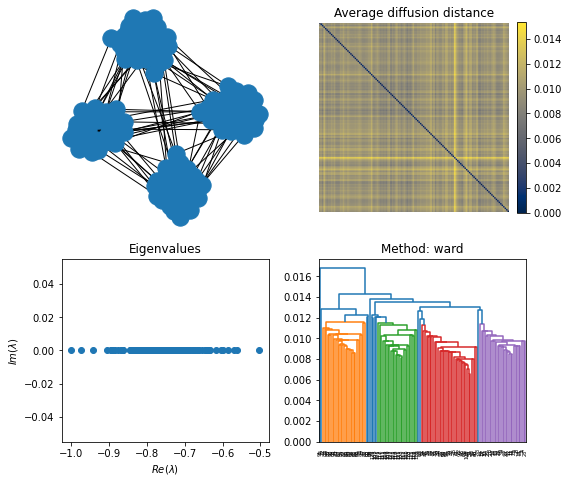

In [154]:
res_epi = distance.jacobian_distance(A_gn, 'Epidemics', norm=True, args=[5, 1])

# Comparison with R

In [184]:
from rpy2 import robjects

In [185]:
robjects.r('''
    add_nums <- function(x, y) {
        return(x + y)
    }
    
    print(add_nums(x = 5, y = 10))
    print(add_nums(x = 10, y = 20))
''')

[1] 15
[1] 30


30.000000


In [318]:
my_obj = robjects.r('''
    library(dendextend)
    library(corrplot)
    
    ### DEFINE NAMES
    names <- c('results/diffusion_N_128_C_4_pin_0.7_pout_0.01.txt',
                'results/Epidemics_[1, 1]_N_128_C_4_pin_0.7_pout_0.01.txt',
                'results/Epidemics_[5, 1]_N_128_C_4_pin_0.7_pout_0.01.txt',
                'results/Epidemics_[10, 1]_N_128_C_4_pin_0.7_pout_0.01.txt',
                'results/Epidemics_[50, 1]_N_128_C_4_pin_0.7_pout_0.01.txt',
                'results/Epidemics_[100, 1]_N_128_C_4_pin_0.7_pout_0.01.txt')
    
    params <- c('Diffusion',
                'Epi, mu=1',
                'Epi, mu=5',
                'Epi, mu=10',
                'Epi, mu=50',
                'Epi, mu=100')
    nn <- length(names)
    
    mats <- list()
    dends <- dendlist()
        
    for (i in seq_along(names)){
        print(name)
        
        # Load mat
        mat <- scan(names[i])
        mat <- matrix(mat, ncol = 128, byrow = TRUE)
        mat <- as.dist(mat)
        
        # Store mat
        mats[[i]] <- mat
        
        # Compute dendrogram
        dend <- hclust(mat, method = "average")
        dend <- as.dendrogram(dend)
        
        # Store dend
        dends[[i]] <- dend
    }
    
    ### PLOT CORRPLOT
    png("corrplot.png") # open image
    #jpeg('corrplot.jpg') pdf("corrplot.pdf")
    cor_mat <- cor.dendlist(dends) # compute correlation matrix
    colnames(cor_mat) <- params # set labels
    rownames(cor_mat) <- params
    corrplot(cor_mat, method = 'circle', type = 'upper', diag = FALSE, addCoef.col ='red', number.cex = 1.2)
    dev.off()
''')

[1] "results/Epidemics_[100, 1]_N_128_C_4_pin_0.7_pout_0.01.txt"


[1] "results/Epidemics_[100, 1]_N_128_C_4_pin_0.7_pout_0.01.txt"


[1] "results/Epidemics_[100, 1]_N_128_C_4_pin_0.7_pout_0.01.txt"


[1] "results/Epidemics_[100, 1]_N_128_C_4_pin_0.7_pout_0.01.txt"


[1] "results/Epidemics_[100, 1]_N_128_C_4_pin_0.7_pout_0.01.txt"


[1] "results/Epidemics_[100, 1]_N_128_C_4_pin_0.7_pout_0.01.txt"


# Best partition

In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform

In [100]:
dd, Z = res_rand[0], res_rand[1]

In [61]:
c, coph_dists = cophenet(Z, squareform(dd))

In [62]:
c, coph_dists

(0.991155865101784,
 array([0.0110092 , 0.0110092 , 0.01520363, ..., 0.00679255, 0.01226445,
        0.01226445]))

In [68]:
from sklearn.metrics import silhouette_score
silhouette_score(dd, Z, metric="precomputed")

In [101]:
n_clust = np.arange(2,40)
scores = np.zeros(len(n_clust))

for i, clust in enumerate(n_clust):
    comms = fcluster(Z, criterion='maxclust', t=clust)
    
    scores[i] = silhouette_score(dd, comms, metric="precomputed")
    
best = np.argmax(scores)

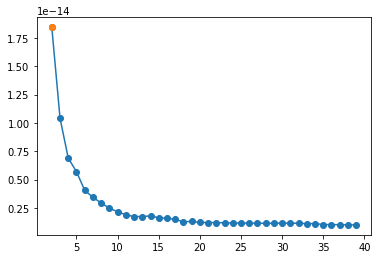

In [102]:
plt.plot(n_clust, scores, 'o-')
plt.plot(n_clust[best], scores[best], 'o')
plt.show()